# Welcome to the biostatistics tutorial!

In this tutorial we will use a Jupyer notebook in Python language to analyze some biological datasets and perform statistical analysis and statistical tests. 

The tutorial is inspired by: 
- Pollard et al (2019), "Empowering Statistical Methods for Cellular and Molecular Biologists",  Molecular Biology of the CellVol. 30, No. 12 https://www.molbiolcell.org/doi/full/10.1091/mbc.E15-02-0076 

In case you are familiar with R language, have a look at the original tutorial which was written in R.

# Outline of the Tutorial

In this tutorial we will analyze six data sets (provided as Excel files), each using a different statistical test:

1. Fisher Exact test for association between binary variables
2. Welch's t-test for unequal variances
3. Student's t-test on log transformed responses
4. Logistic regression for categorical response and two treatment variables
5. Chi-Square contingency test on combined response and combined treatment groups
6. ANOVA with Tukey-Kramer post-hoc

For each example, the following steps are taken:
-  State biological hypothesis
-  State the number and types of variables
-  Determine the preferred statistical test and null hypothesis
-  Check if data meet the assumptions of the preferred statistical test
-  Decide what statistical test to use
-  Run the statistical test
-  Interpret the results of the statistical test
-  Display the data and statistical results in a figure

You do not need to install Python or perform any of the analyses in the tutorial in order to learn from the examples!

# The computational tools

## What is Python?

Python is a high-level, interpreted, general-purpose programming language. It provides a wide range of tools useful to perform biostatistical analysis. You can find a simple tutorial focusing on the essentials you need to know to start programming with Python.
https://realpython.com/python-first-steps/

## What is a Jupyter notebook?

A Jupyter Notebook is an open source application that you can use to create and share documents that contain live code, analysis, visualizations, and text. This tutorial was created in Jupyter notebook and can be run as a live notebook, either in the cloud, or you can download it and run it locally in you computer.

In a Jupyter notebook code blocks are in grey boxes (see just below), and output from running the code (including plots) just after the python code blocks.

To execute the code, you can use the "Run" button or pressing shift + enter. 

In [1]:
print('this is the output from some python code')

this is the output from some python code


You can create new blocks or, alternatively, you can edit the code of existing blocks:


In [2]:
# These first 3 lines are a comment in Python, as they starts with the pound sign "#"
# print('this is just a comment, it is not run')
# Try to edit the content below to change the output of the cell

22+5

27

More information on Jupyter notebooks here: https://realpython.com/jupyter-notebook-introduction/


## How to run this Jupyter notebook on cloud?

You don't have to do anything but copy and paste the following URL in your web browser:

https://mybinder.org/v2/gh/matteofigliuzzi/biostatistics_tutorial/main?labpath=notebooks%2FTutorial_HypothesisTesting_Jupyter_python.ipynb

and the interactive notebook will be opened in your browser.

I have pre-built a Binder repository associated to the following github repo: https://github.com/matteofigliuzzi/biostatistics_tutorial . Binder is a service provided by the Binder Project. It allows you to input the URL of any public Git repository, and it will open that repository within the native Jupyter Notebook interface. You can run any notebooks in the repository, though any changes you make will not be saved back to the repository. You don't have to create an account with Binder and you don't need to be the owner of the repository, though the repository must include a configuration file that specifies its package requirements. The dependency files are used by Binder be used to build a Docker image, where all configurations and dependencies to run the notebook are already satisfied.

## How to run this notebook locally on you computer?

To run the notebook on your computer, you have to download it (https://github.com/matteofigliuzzi/biostatistics_tutorial) and make sure that you have Python, Jupyter notebook installed (and all dependencies satisfied).

### Installing python
Installing Python is generally easy, and nowadays many Linux and UNIX distributions include a recent Python. Even some Windows computers (notably those from HP) now come with Python already installed. If you do need to install Python and aren't confident about the task you can find a few notes on the BeginnersGuide/Download wiki page, but installation is unremarkable on most platforms.

### Downloading and using Jupyter
To install Jupyter, following the instructions on this page: https://jupyter.org/install
After Jupyter is installed, you will also need to allow Jupyter to run R by following the instructions on this page: https://anaconda.org/chdoig/jupyter-and-conda-for-r/notebook

# Importing the libraries

Although you only have to install a specialized package once (this was done by Binder if you are running the notebook on cloud), you have to load the package every time you restart python and want to use functions in the package.  

In Python language, packages or modules can be loaded using the import statement as follows:

In [118]:
import numpy as np #The fundamental package for scientific computing with Python
from scipy import stats as st # Fundamental algorithms for scientific computing in Python 
import pandas as pd #data analysis and manipulation tool
import seaborn as sns #data visualization 
from matplotlib import pyplot as plt #data visualization
from bioinfokit.analys import stat #biostatistical analysis, check documentation here https://github.com/reneshbedre/bioinfokit

# Example 0: Fisher Exact test for binary variables

In this first example, we are testing the biological hypothesis that a mutant genotype affects a phenotype we are measuring. Our statistical null hypothesis is that genotype has no effect on the phenotype.

There are two variables in the experiment: Genotype and Phenotype. Genotype is a categorical variable with two possible values: WT and Mutant. Phenotype is dicothomous variable (Pizza or Pasta). Phenotype is our response variable. Genotype is our treatment variable.

Based on these two variables, we will run a Fisher Exact Test to check if they are significantly associated or not.

In [4]:
# read fist data file into dataframe
data0 = pd.read_excel('../data/dataset0.xlsx')

In [5]:
# show the first 5 lines of the dataframe
data0.head(5)

,Genotype,Phenotype
0,Mutant,Pizza
1,Mutant,Pizza
2,WT,Pizza
3,WT,Pizza
4,Mutant,Pizza


In [6]:
# show the last 3 lines of the dataframe
data0.tail(3)

,Genotype,Phenotype
197,Mutant,Pizza
198,WT,Pizza
199,WT,Pasta


In the above code blocks we read the data in from an Excel file and saved it in a data frame variable called 'data1'. The data appears to have been read in correctly. Each row is a record and the columns are the variables. In this case, each individual has a genotype and measurement. 

In [78]:
# look at the size of the dataframe (rows, columns)
data0.shape

(200, 2)

In [79]:
#use pandas to calculate phenotype frequency
data0['Phenotype'].value_counts()

Pizza    122
Pasta     78
Name: Phenotype, dtype: int64

In [80]:
#use pandas to calculate genotype frequency
data0['Genotype'].value_counts()

WT        100
Mutant    100
Name: Genotype, dtype: int64

In [81]:
# use pandas to calculate a contingency table
table = pd.crosstab(data0.Phenotype,data0.Genotype)
display(table)

Genotype,Mutant,WT
Phenotype,,
Pasta,28,50
Pizza,72,50


<AxesSubplot:xlabel='Genotype', ylabel='Count'>

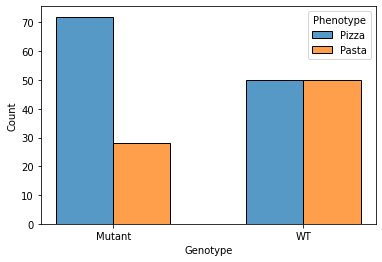

In [82]:
#histogram of the phenotype data, stratified by genotype
sns.histplot(data=data0,x='Genotype',hue='Phenotype',multiple='dodge',shrink=0.6)

In [101]:
# Perform Fisher exact test, setting alpha=0.05
fisher_test = st.fisher_exact(table)

In [102]:
print('Fisher Exact Test p-value is:',fisher_test[1])

Fisher Exact Test p-value is: 0.0022333075142261846


Our p-value is less than our alpha value of 0.05 so we reject the null hypothesis that genotype has no effect on our measured response.

# Example 1: Welch's t-test for unequal variances

In this example, we are testing again the biological hypothesis that a mutant genotype affects a phenotype we are measuring. Our statistical null hypothesis is that genotype has no effect on the measurement.

Again, there are two variables in the experiment: Genotype and Measurement. Genotype is a categorical variable with two possible values: WT and Mutant. 
Measurement is now a continuous numerical variable. Measurement is our response variable. Genotype is our treatment variable.

Based on these two variables, we will run a Student's two-sample t-test as long as we can meet the assumptions of that test: normally distributed responses within each treatment and equal variances between treatments. We have to look at our data to see if we have met these assumptions.

In [85]:
# read fist data file into data frame object
data1 = pd.read_excel('../data/dataset1.xlsx')

/home/matteo/miniconda2/lib/python3.7/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [86]:
# look at the first several rows of data
data1.head(5)

,Genotype,Measurement
0,WT,12.0
1,WT,8.0
2,WT,14.0
3,WT,14.5
4,WT,3.5


In [87]:
# look at the size of the dataframe (rows, columns)
data1.shape

(40, 2)

In [88]:
# look at summary information on the Measurement variable
data1['Measurement'].describe()

count    40.000000
mean     16.414500
std       9.579658
min       2.000000
25%      10.000000
50%      14.250000
75%      21.625000
max      45.000000
Name: Measurement, dtype: float64

The describe function shows us some information about the data. From that we learn that the measurements range from 2 to 45.

We are interested in checking the assumptions of the t-test so we plot the data and calculate  summary statistics.

<AxesSubplot:xlabel='Genotype', ylabel='Measurement'>

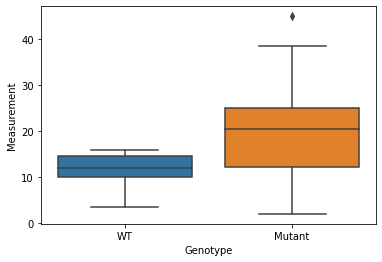

In [89]:
# plot data as boxplot
sns.boxplot(data=data1,x='Genotype',y='Measurement')

<AxesSubplot:xlabel='Genotype', ylabel='Measurement'>

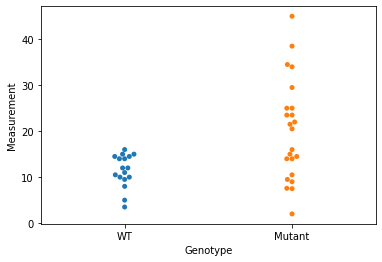

In [92]:
# plot data as swarmplot
sns.swarmplot(data=data1,x='Genotype',y='Measurement')

<AxesSubplot:xlabel='Genotype', ylabel='Measurement'>

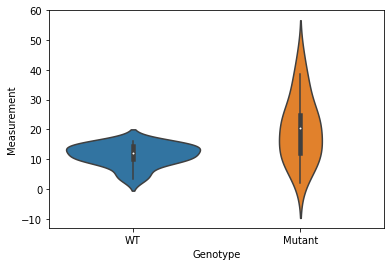

In [93]:
# plot data as violin-plot
sns.violinplot(data=data1,x='Genotype',y='Measurement')

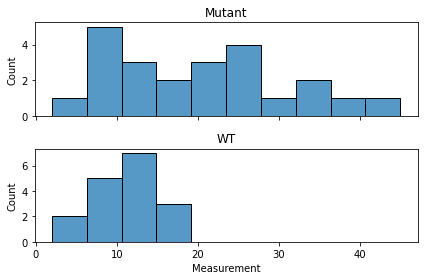

In [95]:
# plot data as stacked histograms

#binning
number_of_bins = 10
min_value = np.floor(data1['Measurement'].min())
max_value = np.ceil(data1['Measurement'].max())
bins = np.linspace(min_value,max_value,number_of_bins+1)

fig,ax=plt.subplots(2,1,sharex=True)
ax[0].set_title('Mutant')
sns.histplot(data=data1[data1.Genotype=='Mutant'],x='Measurement',ax=ax[0],bins=bins)
ax[1].set_title('WT')
sns.histplot(data=data1[data1.Genotype=='WT'],x='Measurement',ax=ax[1],bins=bins)
plt.tight_layout()

In [96]:
#summary statistics, stratified by genotype
data1.groupby('Genotype').agg(['count','mean','median','std','var'])

Measurement                                         
               count       mean median        std         var
Genotype                                                     
Mutant            23  20.090435   20.5  10.962370  120.173559
WT                17  11.441176   12.0   3.570199   12.746324

The boxplot function by default makes a boxplot for this kind of data. From the boxplot you can tell that the variances are somewhat different between genotypes. The histplot function makes histograms. The stacked histograms give a sense for the shapes of each distribution. Although neither looks perfectly normal, neither is strongly skewed. 

The groupby method helps us organize our summary statistics for each genotype. 

The median and mean values for each genotype are very similar, confirming that the distributions are not highly skewed. From this information, we will say that the data have met the t-test assumption of normally distributed responses in each treatment. What about equal variances between treatments? The variances are an order of magnitude different, which violates the assumption of the t-test.

Instead of a Student's t-test, we can run a Welch's t-test which assumes normality but does not assume equal variances.

In [97]:
#extract measurement data from WT records
data_wt = data1[data1.Genotype=='WT']['Measurement'].values
print('data_wt:',data_wt)

#extract measurement data from mutant records
data_mutant = data1[data1.Genotype=='Mutant']['Measurement'].values
print('data_mutant:',data_mutant)

data_wt: [12.   8.  14.  14.5  3.5 10.   9.5 15.  11.  10.5 14.  16.  12.   5.
 10.  15.  14.5]
data_mutant: [23.5  29.5  34.   10.5  14.5   2.    7.58 20.5  16.   14.   23.5  45.
 38.5  25.   14.   34.5   9.   22.    7.5   9.5  21.5  25.   15.  ]


In [103]:
# run Welch's t-test on data, setting alpha=0.05
test_result = st.ttest_ind(data_wt,data_mutant,equal_var=False,alternative='two-sided')
print(test_result)

Ttest_indResult(statistic=-3.5385069236585465, pvalue=0.001427311775263035)


In [104]:
# to know more about how to use a function use help()
help(st.ttest_ind)

Help on function ttest_ind in module scipy.stats.stats:

ttest_ind(a, b, axis=0, equal_var=True, nan_policy='propagate', permutations=None, random_state=None, alternative='two-sided', trim=0)
    Calculate the T-test for the means of *two independent* samples of scores.
    
    This is a two-sided test for the null hypothesis that 2 independent samples
    have identical average (expected) values. This test assumes that the
    populations have identical variances by default.
    
    Parameters
    ----------
    a, b : array_like
        The arrays must have the same shape, except in the dimension
        corresponding to `axis` (the first, by default).
    axis : int or None, optional
        Axis along which to compute test. If None, compute over the whole
        arrays, `a`, and `b`.
    equal_var : bool, optional
        If True (default), perform a standard independent 2 sample test
        that assumes equal population variances [1]_.
        If False, perform Welch's t-test,

In [105]:
# An other library to calculate Welch's t-test on data 
res = stat()
res.ttest(df=data1,xfac='Genotype',res='Measurement',evar=False,test_type=2)
print(res.summary)




Two sample t-test with unequal variance (Welch's t-test)

------------------  ------------
Mean diff            8.64926
t                    3.53851
Std Error            2.44432
df                  27.975
P-value (one-tail)   0.000713656
P-value (two-tail)   0.00142731
Lower 95.0%          3.64209
Upper 95.0%         13.6564
------------------  ------------

Parameter estimates

Level      Number     Mean    Std Dev    Std Error    Lower 95.0%    Upper 95.0%
-------  --------  -------  ---------  -----------  -------------  -------------
Mutant         23  20.0904    10.9624     2.28581        15.35           24.8309
WT             17  11.4412     3.5702     0.865901        9.60555        13.2768



Our p-value is less than our alpha value of 0.05 so we reject the null hypothesis that genotype has no effect on our measured response. When reporting this result in a paper it is best to include t, df, and p-value. Here is what that might look like:

The mutant had significantly different measurements than wild type (Welch's t(2,0.05) = -3.54, df = 27.98, p-value < 0.00143).

The numbers in parentheses next to the t are 2 for a two-sided test (i.e. allowing the effect of the mutant to both increase or decrease the measurement) and 0.05 for the alpha value.

In addition to reporting the result in text, we can also show our data and our results using a figure. We are going to make a stripchart that includes the mean and 95% confidence intervals for each genotype. First we calculate the 95% confidence intervals around the means for each genotype.

# Example 2: Student's t-test on log transformed responses
In this second example we are working with a very similar dataset. The dataset has the same types of variables and we are interested in the same biological hypothesis. The difference comes when we inspect the data to see if it meets the assumptions of a Student's t-test.

In [25]:
# read second data file into data frame object
data2 = pd.read_excel('../data/dataset2.xlsx')
# look at the first several rows of data
data2.head(5)


/home/matteo/miniconda2/lib/python3.7/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,Genotype,Measurement
0,WT,34.510
1,WT,26.355
2,WT,22.285
3,WT,30.940
4,WT,26.160


In [26]:
data2.shape

(63, 2)

In [27]:
# look at summary information
data2.describe()

,Measurement
count,63.000000
mean,39.200365
std,10.499526
min,22.285000
25%,30.105000
50%,39.310000
75%,45.390000
max,63.040000


<AxesSubplot:xlabel='Genotype', ylabel='Measurement'>

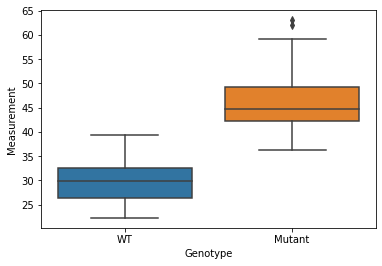

In [28]:
# plot data as boxplot
sns.boxplot(data=data2,x='Genotype',y='Measurement')

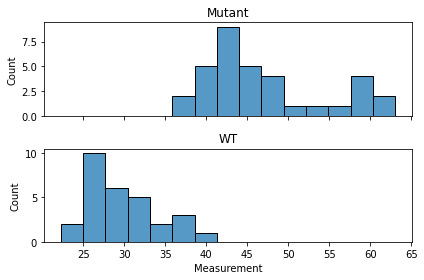

In [106]:
#binning
num_bins= 15
min_value = data2['Measurement'].min()
max_value = data2['Measurement'].max()

bins = np.linspace(min_value,max_value,num_bins+1)

# plot data as stacked histograms
fig,ax=plt.subplots(2,1,sharex=True)
ax[0].set_title('Mutant')
sns.histplot(data=data2[data2.Genotype=='Mutant'],x='Measurement',ax=ax[0],bins=bins)
ax[1].set_title('WT')
sns.histplot(data=data2[data2.Genotype=='WT'],x='Measurement',ax=ax[1],bins=bins)
plt.tight_layout()

In [107]:
#summary statistics, stratified by genotype
data2.groupby('Genotype').agg(['count','mean','median','std','var'])

Measurement                                          LnMeasurement  \
               count       mean   median       std        var         count   
Genotype                                                                      
Mutant            34  47.064059  44.7825  7.304294  53.352706            34   
WT                29  29.980862  29.8450  4.254345  18.099452            29   

                                                 
              mean    median       std      var  
Genotype                                         
Mutant    3.840482  3.801812  0.148693  0.02211  
WT        3.391070  3.396017  0.139534  0.01947

With regard to normality, the measurement responses appear to be somewhat skewed to the right. The median values are less than the mean values, consistent with a slight skew. This might be a violation of the assumption of normality. The responses for the mutant also appear to be slightly bimodal. Student's t-test is robust to small deviations from normality so it is unclear if these departures from normality will be a problem.

The variances are just about three-fold different. Student's t-test is robust to this level of difference in variance but only when the design is balanced. The sample sizes are somewhat different so again we are close to violating this assumption.

The skew in the response is the more serious violation because if it cannot be corrected then we will need to use a non-parametric test with lower power. Right-skewed distributions can sometimes be corrected using a natural log. Note that the function np.log() in python defaults to the natural log, which is commonly written as ln.

In [108]:
# ln transformation
data2['LnMeasurement'] = np.log(data2['Measurement'])


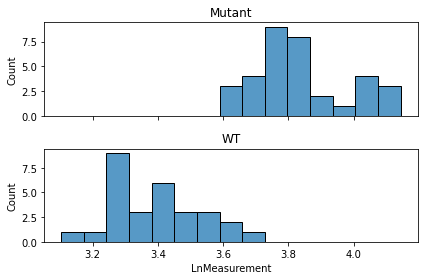

In [109]:
#binning
min_value = data2['LnMeasurement'].min()
max_value = data2['LnMeasurement'].max()
bins = np.linspace(min_value,max_value,num_bins+1)

# plot data as stacked histograms
fig,ax=plt.subplots(2,1,sharex=True)
ax[0].set_title('Mutant')
sns.histplot(data=data2[data2.Genotype=='Mutant'],x='LnMeasurement',ax=ax[0],bins=bins)
ax[1].set_title('WT')
sns.histplot(data=data2[data2.Genotype=='WT'],x='LnMeasurement',ax=ax[1],bins=bins)
plt.tight_layout()

In [110]:
#summary statistics, stratified by genotype
data2.groupby('Genotype')['LnMeasurement'].agg(['count','mean','median','std','var'])

,count,mean,median,std,var
Genotype,,,,,
Mutant,34,3.840482,3.801812,0.148693,0.02211
WT,29,3.391070,3.396017,0.139534,0.01947


The transformation improved the shape of the distributions to be more normal in appearance. The natural log transformation also resulted in the variances being very similar between genotypes. The dataset with natural log transformations of the measurement responses meet the assumptions of Student's t-test.

In [35]:
# run t-test on ln transformed data with alpha set to 0.05 and assumption of equal variance
data_wt = data2[data2.Genotype=='WT']['LnMeasurement']
data_mutant = data2[data2.Genotype=='Mutant']['LnMeasurement']


test_result = st.ttest_ind(data_wt,data_mutant,equal_var=False,alternative='two-sided')
print(test_result)

Ttest_indResult(statistic=-12.361931263431439, pvalue=3.4205271364149156e-18)


In [36]:
# run t-test on ln transformed data with alpha set to 0.05 and assumption of equal variance
data_wt = data2[data2.Genotype=='WT']['Measurement']
data_mutant = data2[data2.Genotype=='Mutant']['Measurement']


test_result = st.ttest_ind(data_wt,data_mutant,equal_var=False,alternative='two-sided')
print(test_result)

Ttest_indResult(statistic=-11.535024245170304, pvalue=3.132955927762612e-16)


The mutant had significantly different measurements than wild type (Student's t(2,0.05) = -12.299, df = 61, p-value < 2.2e-16).


# Example 3: Logistic regression for categorical response and two treatment variables
In the first two examples we had a continuous numerical response variable and a single categorical treatment variable. In this example we have a categorical response variable (Phenotype) and two categorical treatment variables (Genotype & Day).

Our biological hypothesis is that genotype (disomic vs trisomic) affects the proportion of cells that are ciliated. Data was collected over many days so we include Day as a so called 'nuisance' treatment variable. Our statistical null hypotheses are that the proportion of ciliated cells is the same across genotypes and that the proportion of ciliated cells is the same across days.

We can test these hypotheses using logistic regression in a generalize linear model and a series of Wald tests. This approach makes few assumptions about the structure of the data and the glm() function that we will use will warn us if our data are not meeting those assumptions.

More information on performing logistic regression in python can be found here:
- https://realpython.com/logistic-regression-python/
- https://www.reneshbedre.com/blog/logistic-regression.html

In [125]:
# import a few more modules to perform logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import statsmodels.api as sm 

In [128]:
# read third data file into data frame object
# from Domenico Galati et al 2018, Fig 1 (https://doi.org/10.1016/j.devcel.2018.07.008)
data3 = pd.read_excel('../data/dataset3.xlsx')

#show first lines
data3.head()

,Phenotype,Genotype,Day
0,Ciliated,Disomic,1
1,Ciliated,Disomic,1
2,Ciliated,Disomic,1
3,Ciliated,Disomic,1
4,Ciliated,Disomic,1


In [129]:
#data3_sel = pd.concat([data3[data3.Phenotype=='Ciliated'].head(300),data3[data3.Phenotype=='Not Ciliated'].head(520)])

In [130]:
data3.shape

(1058, 3)

In [131]:
data3.value_counts()

Phenotype     Genotype  Day
Not Ciliated  Disomic   2      102
                        1       96
              Trisomic  2       94
                        1       83
Ciliated      Disomic   1       78
Not Ciliated  Trisomic  4       74
                        5       72
                        3       68
Ciliated      Disomic   4       63
Not Ciliated  Disomic   3       59
                        4       57
                        5       57
Ciliated      Disomic   5       51
                        2       23
              Trisomic  5       20
                        1       16
                        4       14
              Disomic   3       13
              Trisomic  3       10
                        2        8
dtype: int64

We will now run the glm() function on the data. We need to tell the glm() function which variable is the response variable and which variables are treatment variables. This is done in R by putting the response variable to the left of a tilda symbol and the treatment variables to the right of the tilda symbol with plus signs between treatment variables. The glm() function also needs to know what kind of regression we plan to do. Because our response variable is a binary categorical variable, the appropriate type of regression is called logistic regression. We specify this by telling glm() to use a binomial error distribution. The binomial distribution quantifies the probability of a binary outcome, like flipping a coin to get heads versus tails. Here, the binary outcome is ciliated versus not, and the logistic regression model is a way to allow the probability of being ciliated to depend on genotype and day.

In [132]:
# Encode the categorical variables in binary numeric variables
data3['Genotype_numeric'] = data3['Genotype'].replace(['Disomic','Trisomic'],[0,1])
data3['Phenotype_numeric'] = data3['Phenotype'].replace(['Ciliated','Not Ciliated'],[0,1])


In [134]:
# logistic regression model
# get independent variables
X = data3[['Day','Genotype_numeric']]
# to get intercept -- this is optional
# X = sm.add_constant(X)
# get response variables
Y = data3[['Phenotype_numeric']]
# fit the model with maximum likelihood function
model = sm.Logit(endog=Y, exog=X).fit()

print(model.summary())

Optimization terminated successfully.
         Current function value: 0.568465
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:      Phenotype_numeric   No. Observations:                 1058
Model:                          Logit   Df Residuals:                     1056
Method:                           MLE   Df Model:                            1
Date:                Wed, 25 May 2022   Pseudo R-squ.:                 0.04095
Time:                        17:20:49   Log-Likelihood:                -601.44
converged:                       True   LL-Null:                       -627.12
Covariance Type:            nonrobust   LLR p-value:                 7.677e-13
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Day                  0.0894      0.025      3.520      0.000       0.040       0.139
Genotype_nu

In [135]:
# Odd ratio
np.exp(model.params['Genotype_numeric'])

4.447778175369323

In [136]:
# build a generalized linear model of Phenotype with binomial errors and Genotype and Day as treatments
model = LogisticRegression()

x = data3[['Day','Genotype_numeric']]
y = data3['Phenotype_numeric']
model.fit(x,y)

LogisticRegression()

In [137]:
#coeff
model.coef_

array([[-0.1279449 ,  1.26075561]])

In [138]:
model.score(x,y)

0.720226843100189

In [139]:
confusion_matrix(y, model.predict(x))

array([[  0, 296],
       [  0, 762]])

In [141]:
#odds:
np.exp(model.coef_[0][1])

3.528086344766914

The section of the glm() function output that we are most interested in is the coefficients. The line that starts with "GenotypeTrisomic" tells us about the effect of genotype. The magnitude of the effect of being Trisomic vs Disomic is 1.2705. This coefficient is calculated as the natural log of the odds ratio. A Wald test was run on this coefficient to determine if it is a significant departure from what would be expected if there was no effect of genotype. The Wald test is based on z-scores. Dividing the coefficient by the standard error results in a z-score of 7.933 which has a p-value of 2.14e-15. So genotype has a very significant effect on the proportion of cells with cilia.

Simiarly, there were significant effects of what day the experiment was conducted on. Day2 and Day3 were both significantly different from Day1. Although the effect of day was not of interest, by including it as a variable in the model we were able to estimate and therefore control for significant variation in the proportion of cells with cilia across days. Controling for the day effect allowed us to more accurately estimate the effect and significance of genotype.

Next we want to display our results. It is very common to see this kind of data displayed as a bar graph with proportion or percentage on the y-axis and the different treatment categories on the x-axis. That is a fine way to display the data but it doesn't convey information about the hypothesis being tested.

An Odds Ratio plot is an excellent way to convey the effect of a binary categorical treatment variable on a binary categorical response variable. In this case the Odds Ratio = (Ciliated Disomic / Not Ciliated Disomic) / (Ciliated Trisomic / Not Ciliated Trisomic). As mentioned above, the coefficient estimated for GenotypeTrisomic is the natural log of the odds ratio. So the inverse natural log (i.e. 'e') of the coefficient is the odds ratio. Although it was not printed out to the screen, the glm() function also calculated the 95% confidence interval for the coefficient, which can also be converted to an odds ratio using the inverse natural log.

The figure conveys that the odds of having cilia in disomic cells is ~3.5 times higher than in trisomic cells. It also conveys that this difference significantly exceeds the null expectation of equal odds (the dashed line at 1), consistent with the small and significant p-value from the Wald test run by the glm() function.

# Example 4: Chi-Square contingency test on combined response and combined treatment groups
This example is similar to the previous example in that there is a categorical response variable and the treatment is categorical. However, in this example there is only one categorical treatment variable so instead of logistic regression we can run a chi-square contingency test.

The biological hypothesis is that loss of expression of the gene JMJD2A causes decreased expression of the gene Sox2 in developing chicken neural plate. The four treatments were control morpholino (Control-MO), translation blocking JMJD2A morpholino (JmjD2A-tbMO), splicing blocking JMJD2A morpholino (JmjD2A-sbMO), and splicing blocking JMJD2A morpholino plus JmjD2A full-length rescue vector. The response was Sox2 expression for each embryo categorized as full wild type expression (WT), mild decrease in expression (Mild), or strong decrease in expression (Strong). An appropriate null hypothesis is that Sox2 expression response is independent of JMJD2A treatment.

We can test our null hypothesis with a chi-square contingency test. The test calculates the expected counts of each combination of treatment and response assuming independence. The assumptions of the test are that none of the expected counts are less than 1 and <20% of the expected counts are less than 5. Let's look at the data to see if they meet these assumptions.

In [142]:
# read fourth data file into data frame object
data4 = pd.read_excel('../data/dataset4.xlsx')
data4.head()

,Treatment,Phenotype
0,Control-MO,Mild
1,Control-MO,Mild
2,Control-MO,WT
3,Control-MO,WT
4,Control-MO,WT


In [143]:
# create a contingency table
table = pd.crosstab(data4.Treatment,data4.Phenotype)
table

Phenotype,Mild,Strong,WT
Treatment,,,
Control-MO,2,0,20
JmjD2A-sbMO,3,7,2
JmjD2A-sbMO+pCI-JmjD2A,4,2,9
JmjD2A-tbMO,10,14,13


The table() function converted the long format data into a table of counts for combinations of treatment and phenotype (Sox2 expression). An efficient way to get the expected counts from the observed counts is to run the chisq.test() function and then print out the expected counts which it calculates.

In [144]:
# run chi-square test with correct = F because this is not a 2x2 table
chi2test = st.chi2_contingency(table,correction=False)

In [145]:
#print expected counts
chi2test[3]

array([[ 4.86046512,  5.88372093, 11.25581395],
       [ 2.65116279,  3.20930233,  6.13953488],
       [ 3.31395349,  4.01162791,  7.6744186 ],
       [ 8.1744186 ,  9.89534884, 18.93023256]])

Although the expected counts meet the first assumption that none can be less than 1, they do not meet the second assumption that <20% are less than 5. 5 out of 12 (41.7%) are less than 5.

There are two ways to handle this situation. One way is to increase sample sizes for each of the treatments. Another way is to consider if any of the treatment or response categories could be combined such that the assumption is satisfied while keeping the outcome of the hypothesis test interpretable and meaningful.

Given the biological hypothesis that loss of expression of the gene JMJD2A causes decreased expression of the gene Sox2, the two treatments intended to decrease expression of JMJD2A (JmjD2A-tbMO & JmjD2A-sbMO) could be combined and the two responses that involve decreased expression of Sox2 (Mild & Strong) could be combined.

In [54]:
# this is an inelegant way of making a new counts table with JmjD2A-tbMO & JmjD2A-sbMO combined and Mild & Strong combined
#(data4.table.comb <- matrix(c(2+0,20,3+7+10+14,2+13,4+2,9), nrow = 3, byrow = T, dimnames = list(Treatment = c("Control-MO","JmjD2A-sbMO+tbMO","JmjD2A-sbMO+pCI-JmjD2A"), Phenotype = c("Mild+Strong","WT"))))

Now check the expected counts for this new observed counts table.

In [55]:
# run chi-square test with correct = F because this is not a 2x2 table
#chitest4comb <- chisq.test(data4.table.comb, correct = F)
# print expected counts
#chitest4comb$expected

Now all expected values are 5 or more so the assumptions of the test have been met.

In [56]:
#chitest4comb

The test resulted in a significant p-value. So we reject the null hypothesis that Sox2 expression is independent of treatments decreasing JMJD2A expression.

A table is an excellent way of displaying data from a contingency analysis. If a figure is desired, a mosaic plot is an appropriate type of graph.

In [57]:
# set plot width & height (only needed for Jupyter)
#options(repr.plot.width=7, repr.plot.height=7)
# first make a table of proportions rather than counts
#(data4.table.comb.prop <- data4.table.comb / matrix(c(rep(sum(data4.table.comb[1,]),2), rep(sum(data4.table.comb[2,]),2), rep(sum(data4.table.comb[3,]),2)), nrow = 3, byrow = T))
# use barplot to make a mosaic plot
#barplot(t(data4.table.comb.prop), legend = T, width = c(sum(data4.table.comb[1,]), sum(data4.table.comb[2,]), sum(data4.table.comb[3,])), ylab="Proportion", args.legend = list(x = "top", bty="n"))

The mosaic plot conveys the differences in response proportions across treatments. Sample sizes for each treatment are reflected in the width of the bars. This figure could be improved by overlaying the counts in each bar.

# Example 5: ANOVA with Tukey-Kramer Post-hoc
In this example there is a categorical treatment variable and a continuous numerical response variable, just like the first two examples. However, in this example, the categorical treatment variable has four groups, three RNAi treatments and one control treatment.

The biological hypothesis is that RNAi against all three members of the ZLW gene family results in decreased fluorescence intensity of a reporter. A common mistake is to perform a series of t-tests, which does not control the false positive rate at or below 0.05. If all six pairwise comparisons were made using t-tests, the false positive rate would be capped at 6 x 0.05 = 0.3, which is quite high. A single ANOVA test can be run to determine if any of the mean responses across treatments are different. The null hypothesis is that the mean responses are the same across all treatments. If we reject this null hypothesis from the ANOVA, we can then run a Tukey-Kramer post-hoc analysis to determine which pairs of treatments are significantly different. And all of that can be done while keeping the false positive rate no higher than 0.05.

ANOVA has the same assumptions as t-tests: normality of responses within treatments and equal variances across treatments. Let's see if the data meet these assumptions.

In [58]:
# read fifth data file into data frame object
data5 = pd.read_excel('../data/dataset5.xlsx')

data5.head()

,Treatment,Intensity
0,control,22.657404
1,control,23.579866
2,control,25.032765
3,control,28.581048
4,control,12.638599


In [59]:
data5.describe()

,Intensity
count,298.000000
mean,14.417329
std,5.553955
min,0.395759
25%,10.809939
50%,14.264491
75%,17.750864
max,30.610109


In [60]:
data5.Treatment.value_counts()

ZLW2-RNAi    76
ZLW3-RNAi    75
control      74
ZLW1-RNAi    73
Name: Treatment, dtype: int64

<AxesSubplot:xlabel='Treatment', ylabel='Intensity'>

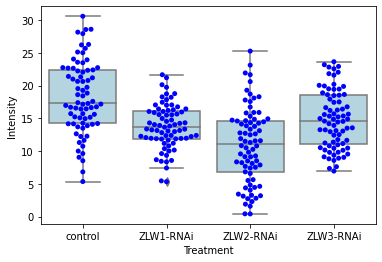

In [61]:
sns.boxplot(data=data5,x='Treatment',y='Intensity',color='lightblue')
sns.swarmplot(data=data5,x='Treatment',y='Intensity',color='b')

0.395759006651874 30.6101092972905
[ 0.39575901  2.55392688  4.71209476  6.87026264  9.02843052 11.1865984
 13.34476627 15.50293415 17.66110203 19.81926991 21.97743779 24.13560566
 26.29377354 28.45194142 30.6101093 ]


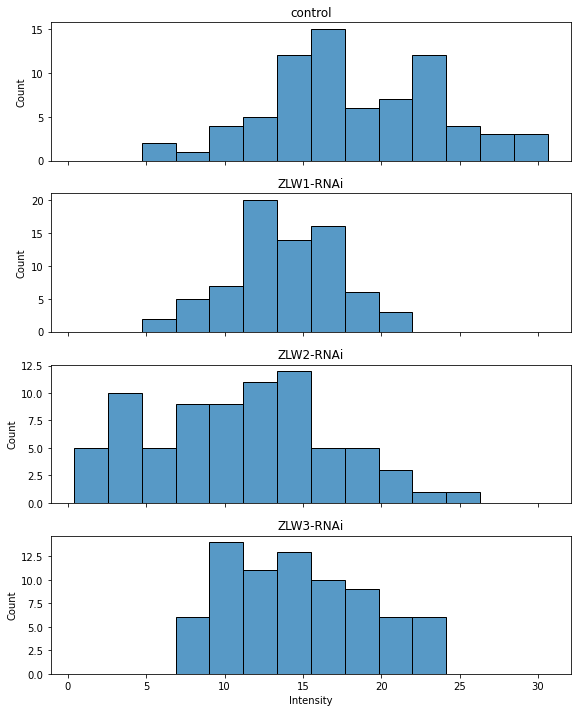

In [62]:
#binning
min_value = data5['Intensity'].min()
max_value = data5['Intensity'].max()
print(min_value,max_value)

bins = np.linspace(min_value,max_value,15)
print(bins)

# plot data as stacked histograms
fig,ax=plt.subplots(4,1,sharex=True,figsize=(8,10))
i=0
for treatment in data5['Treatment'].unique():
    ax[i].set_title(treatment)
    sns.histplot(data=data5[data5.Treatment==treatment],x='Intensity',ax=ax[i],bins=bins)
    i = i+1

plt.tight_layout()

In [63]:
#summary statistics, stratified by genotype
data5.groupby('Treatment')['Intensity'].agg(['count','mean','median','std','var'])

,count,mean,median,std,var
Treatment,,,,,
ZLW1-RNAi,73,13.770633,13.651373,3.437403,11.815741
ZLW2-RNAi,76,10.909480,11.074733,5.808174,33.734889
ZLW3-RNAi,75,14.802026,14.582568,4.420197,19.538139
control,74,18.268046,17.342060,5.564848,30.967528


The distributions of responses for each treatment look approximately normally distributed. The variances are not equal but are all less than three fold different. ANOVA is robust to this level of difference in variance as long as the experiment is balanced. Sample sizes are large and almost identical so it is balanced. It appears we have met the assumptions of ANOVA.

In [64]:
data_control = data5[data5.Treatment == 'control']['Intensity']
data_zlw1 = data5[data5.Treatment == 'ZLW1-RNAi']['Intensity']
data_zlw2 = data5[data5.Treatment == 'ZLW2-RNAi']['Intensity']
data_zlw3 = data5[data5.Treatment == 'ZLW3-RNAi']['Intensity']

#ANOVA
st.f_oneway(data_control,data_zlw1,data_zlw2,data_zlw3)

F_onewayResult(statistic=28.679476925398202, pvalue=2.7039219455511927e-16)

The aov() function, like the glm() function from the third example, takes an equation written as Response ~ Treatment. In our case that was Intensity ~ Treatment. The summary() function provides the results we seek. ANOVA runs what is called an F-test. Large values of F mean that the differences in responses amongst treatments are large compared to differences in responses within treatments. F values close to 1 mean that the differences in responses amongst treatments are similar to differences in responses within treatments. In our case, we got an F value of 28.68, which is very large and has a very significant p-value of 2.7e-16. We therefore reject the null hypothesis that the mean responses are the same across treatments.

If and only if you get a significant result from an ANOVA, you can run a Tukey-Kramer post-hoc analysis to determine which pairs of treatments differ significantly.

In [65]:

# perform multiple pairwise comparison (Tukey's HSD)
# unequal sample size data, tukey_hsd uses Tukey-Kramer test
res = stat()
res.tukey_hsd(df=data5, res_var='Intensity', xfac_var='Treatment', anova_model='Intensity ~ C(Treatment)')
res.tukey_summary

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,control,ZLW1-RNAi,4.497413,2.404644,6.590182,7.852891,0.001000
1,control,ZLW2-RNAi,7.358565,5.286694,9.430437,12.978317,0.001000
2,control,ZLW3-RNAi,3.466019,1.387345,5.544694,6.093019,0.001000
3,ZLW1-RNAi,ZLW2-RNAi,2.861152,0.782103,4.940201,5.028799,0.002467
4,ZLW1-RNAi,ZLW3-RNAi,1.031394,-1.054435,3.117222,1.806899,0.568718
5,ZLW2-RNAi,ZLW3-RNAi,3.892546,1.827685,5.957407,6.888599,0.001000


The TukeyHSD() function performed the post-hoc analysis. The function returns a table with each of the six pairwise comparisons of treatments as the rows. The columns are 'diff', which is the difference in mean responses between the two treatments, 'lwr' and 'upr', which are the bounds of the 95% confidence interval for the 'diff', and 'p adj', which is the p-value from a q-test. In this case, five of the six possible pairwise comparisons had significantly different responses, demonstrated by a 'p adj' value less than 0.05 and a confidence interval that does not overlap zero. Only ZLW3 RNAi vs ZLW1 RNAi was not significant.

By using the ANOVA to Tukey-Kramer approach, we have kept the false positive rate at or below 0.05. We can draw the conclusion that RNAi of all three ZLW family genes significantly decreases fluorescence intensity of our reporter relative to a control. We can further say that RNAi of ZLW2 has a stronger effect on the fluorescence intensity of the reporter than ZLW1 and ZLW3.

For displaying our results in a figure, we can use a stripchart with mean and 95% confidence intervals overlayed like we did for examples 1 and 2. We have already calculated the mean responses for each treatment. Now we need to extract the 95% confidence intervals from the ANOVA result using the confint() function.

The function confint() gets the 95% confidence intervals for the first treatment and refers to this treatment as the intercept. In our case, that was ZLW1-RNAi. It then gets the confidence intervals for the other treatments relative to the "intercept" which is the mean response of ZLW1-RNAi. So in order to get the absolute confidence intervals rather than the relative confidence intervals, we have to add the mean response of ZLW1-RNAi (stored in stats5[1,4]) to all the remaining confidence interval lower and upper values. The second table printed has the absolute confidence intervals.

Now we can make the stripchart.

The figure shows the distribution of responses for each treatment which makes clear that these are overlapping distributions. The 95% confidence intervals around the mean response for each treatment however echo the results from the ANOVA and Tukey-Kramer post-hoc analysis, which is that the means are not equal and all of the treatments have significantly different responses with the exception of ZLW1-RNAi and ZLW3-RNAi. For ZLW1-RNAi and ZLW3-RNAi, the mean response of each treatment is contained within the confidence interval of the other treatment, making it clear that these are not significantly different treatments.